In [37]:
%pip install torchvision

You should consider upgrading via the 'c:\users\dell\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [38]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [39]:
data_dir = 'tomato_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [76]:
test_image_path1 = "healthy.jpg"
test_image_path2 = "septoria_virus.jpg"
test_image_path3 = "mosaic_virus.jpg"
test_image_path4 = "yellow_curl_virus.jpg"
test_image_path5 = "early_blight.jpg"
test_image_path6 = "bacterial_spots.jpg"

Healthy Image


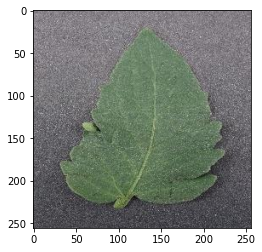

In [87]:
im1 = Image.open(test_image_path1)
plt.imshow(im1)
print("Healthy Image")


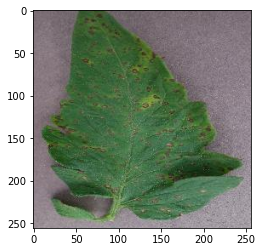

In [80]:
im2 = Image.open(test_image_path2)
plt.imshow(im2)
print("Septoria Virus")

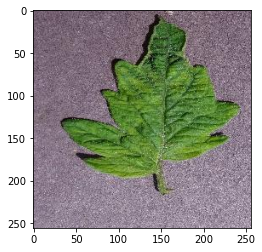

In [81]:
im3 = Image.open(test_image_path3)
plt.imshow(im3)
print("Mosaic Virus")

yellow_curl_virus


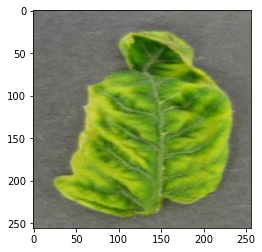

In [88]:
im4 = Image.open(test_image_path4)
plt.imshow(im4)
print("yellow_curl_virus")

early_blight


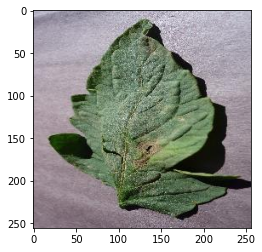

In [90]:
im5 = Image.open(test_image_path5)
plt.imshow(im5)
print("early_blight")

Bacterial Spot


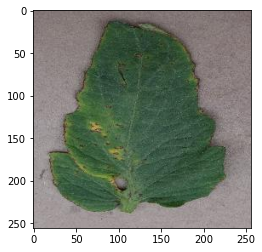

In [167]:
im6 = Image.open(test_image_path6)
plt.imshow(im6)
print("Bacterial Spot")

Healthy Image


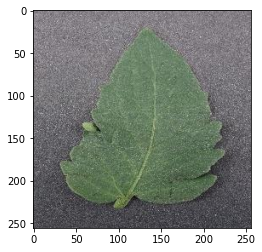

In [176]:
test_image_path = "healthy.jpg"
im = Image.open(test_image_path)
plt.imshow(im)
print("Healthy Image")

Random Rotation 30 degree


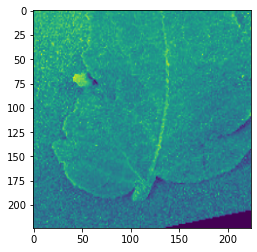

In [177]:
tens = train_transforms(im)
plt.imshow(tens[0])
print("Random Rotation 30 degree")

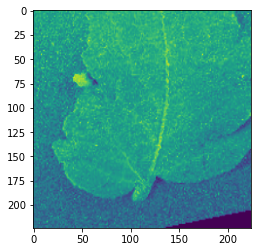

In [178]:
plt.imshow(tens[1])
print("Random Scaling")

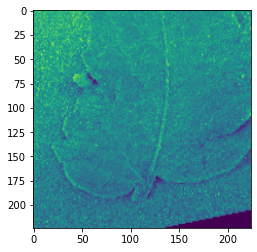

In [179]:
plt.imshow(tens[2])
print("Random Rotation and Resizing")

In [40]:
trainloader

In [41]:
for images, labels in trainloader:
    print(labels)

tensor([4, 4, 0, 4, 3, 4, 4, 0, 3, 4, 4, 4, 0, 0, 4, 4, 4, 3, 0, 3, 4, 4, 0, 4,
        4, 4, 4, 2, 4, 1, 4, 2, 0, 3, 1, 4, 1, 0, 4, 4, 3, 4, 4, 4, 0, 4, 3, 4,
        4, 4, 0, 4, 2, 4, 4, 4, 2, 4, 2, 3, 4, 0, 4, 0])
tensor([4, 0, 4, 4, 4, 1, 4, 4, 3, 0, 1, 0, 0, 4, 2, 4, 4, 4, 4, 2, 2, 3, 3, 4,
        4, 5, 4, 3, 4, 3, 2, 4, 0, 3, 4, 3, 4, 2, 4, 4, 3, 0, 3, 0, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 3, 2, 0, 4, 4, 2, 0, 0, 2, 4])
tensor([5, 4, 1, 3, 0, 3, 1, 2, 4, 5, 4, 4, 0, 4, 4, 4, 0, 4, 4, 3, 2, 4, 3, 4,
        4, 2, 3, 3, 3, 4, 4, 0, 0, 3, 3, 3, 3, 0, 4, 2, 3, 4, 4, 4, 4, 2, 4, 2,
        2, 0, 4, 4, 1, 4, 4, 3, 4, 1, 3, 3, 4, 4, 4, 4])
tensor([0, 4, 0, 4, 2, 4, 2, 2, 2, 4, 3, 1, 0, 4, 0, 3, 3, 2, 0, 1, 3, 4, 4, 2,
        4, 3, 4, 2, 1, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 3, 3, 4, 4, 4, 1, 0, 1, 3,
        4, 4, 4, 1, 0, 4, 3, 4, 3, 4, 4, 4, 5, 2, 3, 1])
tensor([4, 0, 0, 5, 4, 4, 0, 4, 3, 4, 4, 4, 4, 4, 1, 0, 4, 4, 0, 1, 4, 3, 3, 3,
        4, 2, 4, 0, 3, 1, 4, 0, 0, 3, 0, 2, 3, 1, 0,

tensor([4, 1, 0, 4, 4, 4, 4, 0, 4, 3, 3, 4, 1, 4, 1, 0, 3, 4, 4, 4, 3, 4, 3, 1,
        3, 3, 1, 4, 3, 0, 2, 3, 2, 4, 4, 4, 3, 2, 4, 3, 1, 0, 2, 4, 4, 4, 4, 4,
        4, 4, 3, 4, 2, 1, 4, 2, 0, 3, 0, 4, 4, 5, 2, 4])
tensor([4, 4, 0, 2, 4, 0, 3, 4, 1, 4, 0, 0, 4, 0, 4, 5, 4, 4, 1, 1, 2, 4, 4, 1,
        3, 0, 0, 0, 4, 1, 4, 4, 3, 4, 1, 0, 4, 1, 5, 2, 2, 4, 4, 2, 4, 4, 0, 3,
        0, 2, 4, 4, 4, 3, 4, 4, 4, 2, 1, 4, 3, 4, 4, 5])
tensor([0, 1, 0, 4, 4, 4, 0, 2, 0, 0, 4, 4, 4, 3, 2, 4, 2, 3, 0, 4, 0, 3, 4, 0,
        2, 2, 5, 3, 0, 2, 4, 0, 3, 4, 4, 0, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
        0, 4, 4, 5, 5, 0, 2, 4, 3, 4, 4, 3, 4, 0, 1, 3])
tensor([3, 0, 4, 4, 4, 4, 0, 4, 0, 3, 4, 2, 1, 5, 2, 4, 3, 3, 0, 0, 2, 4, 4, 4,
        2, 4, 2, 1, 3, 0, 4, 5, 0, 4, 4, 3, 4, 1, 0, 3, 1, 3, 3, 5, 4, 4, 4, 2,
        4, 2, 4, 4, 4, 0, 3, 2, 0, 3, 2, 0, 0, 4, 1, 4])
tensor([4, 4, 3, 4, 0, 5, 0, 3, 4, 4, 2, 2, 0, 0, 2, 4, 4, 1, 0, 4, 0, 0, 0, 4,
        3, 1, 3, 5, 4, 4, 4, 4, 3, 4, 0, 4, 3, 4, 0,

tensor([4, 4, 4, 3, 4, 1, 4, 4, 0, 4, 3, 0, 2, 1, 2, 3, 4, 4, 2, 3, 1, 4, 4, 2,
        3, 3, 2, 4, 4, 4, 4, 0, 4, 4, 4, 3, 4, 4, 4, 2, 0, 4, 2, 3, 4, 4, 4, 4,
        3, 4, 2, 4, 2, 4, 2, 4, 3, 4, 4, 2, 4, 0, 4, 4])
tensor([4, 4, 0, 4, 4, 1, 4, 0, 4, 0, 3, 4, 3, 4, 2, 2, 4, 4, 4, 4, 3, 4, 4, 4,
        0, 4, 3, 2, 4, 0, 4, 4, 1, 4, 2, 4, 0, 4, 2, 4, 3, 3, 4, 1, 0, 0, 2, 4,
        0, 3, 4, 0, 0, 3, 0, 4, 4, 5, 4, 4, 3, 3, 4, 0])
tensor([2, 1, 4, 2, 3, 2, 1, 0, 5, 2, 2, 2, 0, 2, 0, 4, 0, 2, 4, 4, 3, 5, 5, 0,
        3, 0, 4, 0, 5, 4, 2, 0, 0, 1, 4, 2, 0, 0, 1, 4, 1, 2, 4, 4, 1, 3, 4, 0,
        4, 4, 2, 5, 4, 4, 4, 4, 0, 2, 0, 0, 4, 0, 4, 1])
tensor([0, 4, 5, 0, 4, 3, 0, 4, 4, 4, 4, 4, 0, 4, 1, 2, 3, 4, 0, 3, 3, 4, 0, 4,
        5, 4, 4, 0, 2, 4, 4, 3, 4, 2, 4, 3, 4, 4, 3, 0, 3, 2, 2, 2, 3, 2, 4, 3,
        4, 5, 4, 2, 4, 4, 4, 1, 1, 4, 2, 0, 4, 0, 4, 4])
tensor([2, 4, 4, 4, 1, 2, 3, 4, 4, 0, 0, 4, 3, 4, 4, 4, 1, 1, 1, 4, 3, 3, 4, 3,
        4, 4, 3, 4, 4, 0, 4, 0, 3, 4, 2, 4, 4, 4, 4,

tensor([1, 0, 0, 3, 3, 2, 1, 4, 4, 4, 1, 1, 4, 3, 4, 4, 4, 4, 4, 1, 3, 4, 4, 4,
        3, 3, 2, 0, 4, 1, 2, 2, 4, 1, 4, 4, 4, 3, 0, 4, 4, 0, 4, 3, 0, 3, 4, 2,
        4, 0, 0, 4, 4, 4, 4, 0, 4, 3, 4, 0, 4, 2, 4, 0])
tensor([0, 4, 4, 4, 2, 4, 2, 1, 0, 4, 2, 4, 2, 0, 0, 3, 4, 3, 4, 2, 2, 2, 1, 2,
        3, 2, 0, 4, 0, 0, 4, 0, 4, 4, 0, 4, 4, 4, 4, 2, 1, 3, 3, 3, 0, 4, 2, 1,
        1, 3, 0, 4, 4, 2, 0, 1, 2, 4, 4, 0, 4, 4, 0, 4])
tensor([5, 0, 2, 5, 0, 3, 5, 3, 1, 3, 4, 4, 4, 4, 4, 3, 2, 2, 4, 4, 0, 0, 4, 2,
        4, 0, 2, 4, 4, 0, 4, 0, 4, 0, 4, 4, 4, 2, 4, 2, 4, 4, 1, 2, 4, 0, 4, 0,
        3, 3, 1, 4, 3, 1, 4, 5, 4, 3, 4, 4, 2, 3, 4, 3])
tensor([4, 0, 1, 4, 4, 0, 1, 4, 4, 0, 0, 3, 0, 2, 1, 4, 4, 4, 2, 0, 4, 4, 4, 4,
        2, 3, 4, 2, 0, 5, 1, 4, 0, 2, 2, 3, 3, 4, 4, 1, 1, 2, 4, 3, 2, 3, 0, 4,
        2, 3, 3, 0, 0, 0, 3, 3, 3, 4, 3, 4, 5, 4, 0, 4])
tensor([4, 3, 1, 3, 4, 3, 0, 4, 4, 3, 4, 1, 4, 4, 0, 4, 2, 4, 4, 4, 4, 4, 4, 0,
        3, 3, 3, 4, 3, 0, 4, 2, 4, 4, 3, 4, 0, 2, 0,

In [42]:
trainloader.dataset.classes

['bacterial_spots',
 'early_blight',
 'healthy',
 'septoria_leaf_spot',
 'tomato_Yellow_Leaf_Curl_Virus',
 'tomato_mosaic_virus']

In [43]:
print(torch.cuda.is_available())

False


In [44]:
model = models.resnet50(pretrained=True)
# model = models.densenet121(pretrained=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [45]:
for params in model.parameters():
    params.requires_grad = False

classifier  = nn.Sequential(nn.Linear(2048,1024),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(1024,512),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(512,256),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(256,128),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(128,6),
                           nn.LogSoftmax(dim = 1))
model.fc = classifier

In [46]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [47]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(),lr = 0.001)
model.to('cpu')

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [48]:
import time
device = 'cpu'

In [49]:
epoch = 4
train_lossesAD, test_lossesAD = [], []
for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
#         print("here")
#         images = images.view(images.shape[0], -1)
        start = time.time()
        images, labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
#         print("here2")
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
#                 images = images.view(images.shape[0], -1)
                images, labels = images.to(device),labels.to(device)
                pred = model.forward(images)
                test_loss += criterion(pred,labels)
        
        
                ps = torch.exp(pred)
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model.train()       
        train_lossesAD.append(running_loss/len(trainloader))
        test_lossesAD.append(test_loss/len(testloader))        
        print("Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              f"Time per batch: {(time.time() - start)/3:.3f} seconds"
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Training Loss: 0.740..  Test Loss: 0.415..  Time per batch: 134.518 secondsTest Accuracy: 0.838
Training Loss: 0.441..  Test Loss: 0.259..  Time per batch: 133.896 secondsTest Accuracy: 0.905
Training Loss: 0.318..  Test Loss: 0.190..  Time per batch: 133.771 secondsTest Accuracy: 0.936
Training Loss: 0.314..  Test Loss: 0.172..  Time per batch: 133.304 secondsTest Accuracy: 0.943


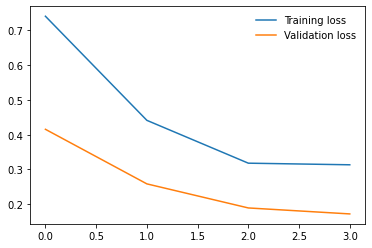

In [50]:
plt.plot(train_lossesAD, label='Training loss')
plt.plot(test_lossesAD, label='Validation loss')
plt.legend(frameon=False)

In [51]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
   print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
conv1.weight 	 torch.Size([64, 3, 7, 7])
bn1.weight 	 torch.Size([64])
bn1.bias 	 torch.Size([64])
bn1.running_mean 	 torch.Size([64])
bn1.running_var 	 torch.Size([64])
bn1.num_batches_tracked 	 torch.Size([])
layer1.0.conv1.weight 	 torch.Size([64, 64, 1, 1])
layer1.0.bn1.weight 	 torch.Size([64])
layer1.0.bn1.bias 	 torch.Size([64])
layer1.0.bn1.running_mean 	 torch.Size([64])
layer1.0.bn1.running_var 	 torch.Size([64])
layer1.0.bn1.num_batches_tracked 	 torch.Size([])
layer1.0.conv2.weight 	 torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight 	 torch.Size([64])
layer1.0.bn2.bias 	 torch.Size([64])
layer1.0.bn2.running_mean 	 torch.Size([64])
layer1.0.bn2.running_var 	 torch.Size([64])
layer1.0.bn2.num_batches_tracked 	 torch.Size([])
layer1.0.conv3.weight 	 torch.Size([256, 64, 1, 1])
layer1.0.bn3.weight 	 torch.Size([256])
layer1.0.bn3.bias 	 torch.Size([256])
layer1.0.bn3.running_mean 	 torch.Size([256])
layer1.0.bn3.running_var 	 torch.Size([256])
layer1.0.bn3.num

layer4.1.bn3.weight 	 torch.Size([2048])
layer4.1.bn3.bias 	 torch.Size([2048])
layer4.1.bn3.running_mean 	 torch.Size([2048])
layer4.1.bn3.running_var 	 torch.Size([2048])
layer4.1.bn3.num_batches_tracked 	 torch.Size([])
layer4.2.conv1.weight 	 torch.Size([512, 2048, 1, 1])
layer4.2.bn1.weight 	 torch.Size([512])
layer4.2.bn1.bias 	 torch.Size([512])
layer4.2.bn1.running_mean 	 torch.Size([512])
layer4.2.bn1.running_var 	 torch.Size([512])
layer4.2.bn1.num_batches_tracked 	 torch.Size([])
layer4.2.conv2.weight 	 torch.Size([512, 512, 3, 3])
layer4.2.bn2.weight 	 torch.Size([512])
layer4.2.bn2.bias 	 torch.Size([512])
layer4.2.bn2.running_mean 	 torch.Size([512])
layer4.2.bn2.running_var 	 torch.Size([512])
layer4.2.bn2.num_batches_tracked 	 torch.Size([])
layer4.2.conv3.weight 	 torch.Size([2048, 512, 1, 1])
layer4.2.bn3.weight 	 torch.Size([2048])
layer4.2.bn3.bias 	 torch.Size([2048])
layer4.2.bn3.running_mean 	 torch.Size([2048])
layer4.2.bn3.running_var 	 torch.Size([2048])
layer

In [52]:
PATH = "90percentResnet"
torch.save(model, PATH)

In [53]:
model_res = torch.load("90percentResnet")
model_res.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [54]:
from PIL import Image
from pathlib import Path
import numpy as np
from torch.autograd import Variable
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import webbrowser

In [55]:
import re

In [56]:
# classes = trainloader.dataset.classes
classes= ['bacterial_spots', 'early_blight', 'healthy', 'septoria_leaf_spot', 'tomato_Yellow_Leaf_Curl_Virus', 'tomato_mosaic_virus']

print(classes)

['bacterial_spots', 'early_blight', 'healthy', 'septoria_leaf_spot', 'tomato_Yellow_Leaf_Curl_Virus', 'tomato_mosaic_virus']


In [184]:
test_image_path = "septoria_virus.jpg"

In [185]:
im = Image.open(test_image_path)
tens = test_transforms(im)
tens = tens.unsqueeze(0)
inp = Variable(tens)
inp = inp.to("cpu")
pred = model_res(inp)

In [186]:
print(pred)

tensor([[-1.7308, -3.2064, -7.3644, -0.2654, -4.3034, -6.6595]],
       grad_fn=<LogSoftmaxBackward0>)


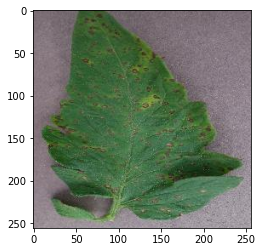

The leaf is diseased
Disease is septoria_leaf_spot


In [187]:
index = pred.data.cpu().numpy().argmax()
img=mpimg.imread(test_image_path)
imgplot = plt.imshow(img)
plt.show()
if index == 2:
    print("The leaf is Healthy")
else:
    print("The leaf is diseased")
    print("Disease is {}".format(classes[index]))
    dis = classes[index]
    dis = re.sub('tomato_',  '',    dis)
    dis = re.sub('_',  '-',    dis)
    webbrowser.open("https://gardenerspath.com/how-to/disease-and-pests/common-tomato-diseases/"+dis)
# print("Predicted image is {}".format(classes[index]))

In [138]:
test_image_path = "bacterial_spots.jpg"

In [139]:
im = Image.open(test_image_path)
tens = test_transforms(im)
tens = tens.unsqueeze(0)
inp = Variable(tens)
inp = inp.to("cpu")
pred = model_res(inp)

In [140]:
print(pred)

tensor([[-3.7649e-03, -6.9622e+00, -1.0628e+01, -6.4179e+00, -6.7641e+00,
         -1.6275e+01]], grad_fn=<LogSoftmaxBackward0>)


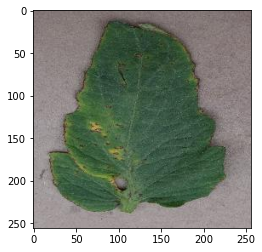

The leaf is diseased
Disease is bacterial_spots


In [142]:
index = pred.data.cpu().numpy().argmax()
img=mpimg.imread(test_image_path)
imgplot = plt.imshow(img)
plt.show()
if index == 2:
    print("The leaf is Healthy")
else:
    print("The leaf is diseased")
    print("Disease is {}".format(classes[index]))
    dis = classes[index]
    dis = re.sub('tomato_',  '',    dis)
    dis = re.sub('_',  '-',    dis)
    webbrowser.open("https://gardenerspath.com/how-to/disease-and-pests/common-tomato-diseases/"+dis)
# print("Predicted image is {}".format(classes[index]))

In [73]:
def test_label_predictions(model, device, test_loader):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction))
            predictions.extend(prediction)
    return [i.item() for i in actuals], [i.item() for i in predictions]

actuals, predictions = test_label_predictions(model_res, 'cpu', testloader)
print('Confusion matrix:')
print(confusion_matrix(actuals, predictions))
print('F1 score: %f' % f1_score(actuals, predictions, average='micro'))
print('Accuracy score: %f' % accuracy_score(actuals, predictions))

Confusion matrix:
[[ 409    4    0   11    3    0]
 [  17  129    0   46    6    2]
 [   0    0  315    4    0    2]
 [   6    2    0  340    3    0]
 [  10    1    0    0 1053    3]
 [   0    0    0   12    4   67]]
F1 score: 0.944467
Accuracy score: 0.944467


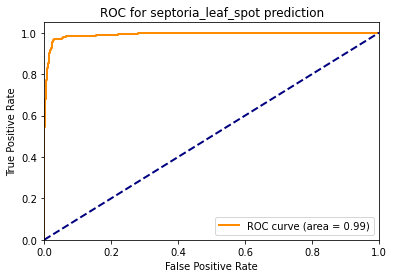

In [74]:
def test_class_probabilities(model, device, test_loader, which_class):
    model.eval()
    actuals = []
    probabilities = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            output = output.to('cpu')
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction) == which_class)
            probabilities.extend(np.exp(output[:, which_class]))
    return [i.item() for i in actuals], [i.item() for i in probabilities]

which_class = 3
actuals, class_probabilities = test_class_probabilities(model_res, 'cpu', testloader, which_class)

fpr, tpr, _ = metrics.roc_curve(actuals, class_probabilities)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for {} prediction'.format(classes[which_class]))
plt.legend(loc="lower right")
plt.show()

In [ ]:
model2 = models.vgg19(pretrained=True)
model2

In [ ]:
for params in model2.parameters():
    params.requires_grad = False

classifier  = nn.Sequential(nn.Linear(2048,1024),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(1024,512),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(512,256),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(256,128),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(128,6),
                           nn.LogSoftmax(dim = 1))
model2.fc = classifier

In [7]:
model2

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [8]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model2.fc.parameters(),lr = 0.001)
model2.to('cpu')

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [10]:
import time as time

In [30]:
begin=time.time()
epoch = 5
train_lossesAD, test_lossesAD = [], []
for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
        
        start = time.time()
        images, labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        output = model2.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
       
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model2.eval()
            for images, labels in testloader:
                
                images, labels = images.to(device),labels.to(device)
                pred = model.forward(images)
                test_loss += criterion(pred,labels)
        
        
                ps = torch.exp(pred)
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model2.train()       
        train_lossesAD.append(running_loss/len(trainloader))
        test_lossesAD.append(test_loss/len(testloader))        
        print("Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              f"Time per batch: {(time.time() - start)/3:.3f} seconds"
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
end=time.time()

KeyboardInterrupt: 